<a href="https://colab.research.google.com/github/mirahg/Translation-Model/blob/main/Translation_Model_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DS4420 Final Project: English-French Translation Model**
## Mirah Gordon and Jeremy Cui
### Adam Optimizer

# Installs







In [ ]:
# Create a directory and clone the Github MT-Preparation repository
!mkdir -p nmt
%cd nmt
!git clone https://github.com/ymoslem/MT-Preparation.git

/content/nmt
Cloning into 'MT-Preparation'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 227 (delta 115), reused 183 (delta 94), pack-reused 0
Receiving objects: 100% (227/227), 54.63 KiB | 2.38 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [ ]:
# Install the requirements
!pip3 install -r MT-Preparation/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:00


# Raw Data

English-French Dataset:

* EN-FR: https://object.pouta.csc.fi/OPUS-UN/v20090831/moses/en-fr.txt.zip

In [ ]:
# Download and unzip a dataset
!wget https://object.pouta.csc.fi/OPUS-UN/v20090831/moses/en-fr.txt.zip
!unzip en-fr.txt.zip

--2023-04-21 20:24:59--  https://object.pouta.csc.fi/OPUS-UN/v20090831/moses/en-fr.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10014972 (9.6M) [application/zip]
Saving to: ‘en-fr.txt.zip’

en-fr.txt.zip       100%[===================>]   9.55M  7.02MB/s    in 1.4s    

2023-04-21 20:25:01 (7.02 MB/s) - ‘en-fr.txt.zip’ saved [10014972/10014972]

Archive:  en-fr.txt.zip
  inflating: UN.en-fr.en             
  inflating: UN.en-fr.fr             
  inflating: README                  


# Data Filtering

Filtering out low-quality segments can help improve the translation quality of the output MT model. This might include misalignments, empty segments, duplicates, among other issues. 

In [ ]:
# Filter the dataset
# Arguments: source file, target file, source language, target language
!python3 MT-Preparation/filtering/filter.py UN.en-fr.fr UN.en-fr.en fr en

Dataframe shape (rows, columns): (74067, 2)
--- Rows with Empty Cells Deleted	--> Rows: 74067
--- Duplicates Deleted			--> Rows: 60662
--- Source-Copied Rows Deleted		--> Rows: 60476
--- Too Long Source/Target Deleted	--> Rows: 59719
--- HTML Removed			--> Rows: 59719
--- Rows will remain in true-cased	--> Rows: 59719
--- Rows with Empty Cells Deleted	--> Rows: 59719
--- Rows Shuffled			--> Rows: 59719
--- Source Saved: UN.en-fr.fr-filtered.fr
--- Target Saved: UN.en-fr.en-filtered.en


# Tokenization / Sub-wording

To build a vocabulary for any NLP model, you have to tokenize (i.e. split) sentences into smaller units. Word-based tokenization used to be the way to go; in this case, each word would be a token. However, an MT model can only learn a specific number of vocabulary tokens due to limited hardware resources. To solve this issue, sub-words are used instead of whole words. At translation time, when the model sees a new word/token that looks like a word/token it has in the vocabulary, it still can try to continue the translation instead of marking this word as “unknown” or “unk”.

There are a few approaches to sub-wording such as BPE and the unigram model. One of the famous toolkits that incorporates the most common approaches is [SentencePiece](https://github.com/google/sentencepiece). Note that you have to train a sub-wording model and then use it. After translation, you will have to “desubword” or “decode” your text back using the same SentencePiece model.



In [ ]:
!ls MT-Preparation/subwording/

1-train_bpe.py	1-train_unigram.py  2-subword.py  3-desubword.py


In [ ]:
# Train a SentencePiece model for subword tokenization
!python3 MT-Preparation/subwording/1-train_unigram.py UN.en-fr.fr-filtered.fr UN.en-fr.en-filtered.en

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=UN.en-fr.fr-filtered.fr --model_prefix=source --vocab_size=50000 --hard_vocab_limit=false --split_digits=true
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: UN.en-fr.fr-filtered.fr
  input_format: 
  model_prefix: source
  model_type: UNIGRAM
  vocab_size: 50000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 1
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 0
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
 

In [ ]:
!ls

en-fr.txt.zip	README	     UN.en-fr.en-filtered.en  UN.en-fr.fr-filtered.fr
MT-Preparation	UN.en-fr.en  UN.en-fr.fr


In [ ]:
# Subword the dataset
!python3 MT-Preparation/subwording/2-subword.py source.model target.model UN.en-fr.fr-filtered.fr UN.en-fr.en-filtered.en

Source Model: source.model
Target Model: target.model
Source Dataset: UN.en-fr.fr-filtered.fr
Target Dataset: UN.en-fr.en-filtered.en
Traceback (most recent call last):
  File "/content/nmt/MT-Preparation/subwording/2-subword.py", line 30, in <module>
    sp.load(source_model)
  File "/usr/local/lib/python3.9/dist-packages/sentencepiece/__init__.py", line 905, in Load
    return self.LoadFromFile(model_file)
  File "/usr/local/lib/python3.9/dist-packages/sentencepiece/__init__.py", line 310, in LoadFromFile
    return _sentencepiece.SentencePieceProcessor_LoadFromFile(self, arg)
OSError: Not found: "source.model": No such file or directory Error #2


In [ ]:
# First 3 lines before subwording
!head -n 3 UN.en-fr.fr-filtered.fr && echo "-----" && head -n 3 UN.en-fr.en-filtered.en

6. Encourage les États Membres à ratifier la Convention internationale contre le dopage dans le sportOrganisation des Nations Unies pour l'éducation, la science et la culture, Actes de la Conférence générale, trente-troisième session, Paris, 3-21 octobre 2005, vol. I : Résolutions, chap. V, résolution 14. ;
Rappelant la Déclaration de HyogoA/CONF.206/6, chap. I, résolution 1. et le Cadre d'action de Hyogo pour 2005-2015Cadre d'action de Hyogo pour 2005-2015 : Pour des nations et des collectivités résilientes face aux catastrophes (A/CONF.206/6, chap. I, résolution 2)., ainsi que la déclaration commune publiée à l'issue de la session extraordinaire sur la catastrophe de l'océan IndienDéclaration commune de la session extraordinaire consacrée à la catastrophe de l'océan Indien : réduction des risques pour un avenir plus sûr (A/CONF.206/6, annexe II)., adoptés à la Conférence mondiale sur la prévention des catastrophes tenue à Kobe, dans la préfecture de Hyogo (Japon), du 18 au 22 janvier

In [ ]:
# First 3 lines after subwording
!head -n 3 UN.en-fr.fr-filtered.fr.subword && echo "---" && head -n 3 UN.en-fr.en-filtered.en.subword

head: cannot open 'UN.en-fr.fr-filtered.fr.subword' for reading: No such file or directory


# Data Splitting

Split the dataset into 3 portions:

1. training dataset - used for training the model;
2. development dataset - used to run regular validations during the training to help improve the model parameters; and
3. testing dataset - a holdout dataset used after the model finishes training to finally evaluate the model on unseen data.

In [ ]:
# Split the dataset into training set, development set, and test set
# here we chose 2000
!python3 MT-Preparation/train_dev_split/train_dev_test_split.py 2000 2000 UN.en-fr.fr-filtered.fr.subword UN.en-fr.en-filtered.en.subword

Traceback (most recent call last):
  File "/content/nmt/MT-Preparation/train_dev_split/train_dev_test_split.py", line 106, in <module>
    extract_dev(segment_no_dev, segment_no_test, source_file, target_file)
  File "/content/nmt/MT-Preparation/train_dev_split/train_dev_test_split.py", line 26, in extract_dev
    df_source = pd.read_csv(source_file,
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 1442, in

In [ ]:
# Line count for the subworded train, dev, test datatest
!wc -l *.subword.*

wc: '*.subword.*': No such file or directory


In [ ]:
# Check the first and last line from each dataset

# -------------------------------------------
# Change this cell to print your name
!echo -e "My name is: FirstName SecondName \n"
# -------------------------------------------

!echo "---First line---"
!head -n 1 *.{train,dev,test}

!echo -e "\n---Last line---"
!tail -n 1 *.{train,dev,test}

My name is: FirstName SecondName 

---First line---
head: cannot open '*.train' for reading: No such file or directory
head: cannot open '*.dev' for reading: No such file or directory
head: cannot open '*.test' for reading: No such file or directory

---Last line---
tail: cannot open '*.train' for reading: No such file or directory
tail: cannot open '*.dev' for reading: No such file or directory
tail: cannot open '*.test' for reading: No such file or directory


# Mount your drive to save your data

Click the folder icon to the left, and then click the Google Drive icon.

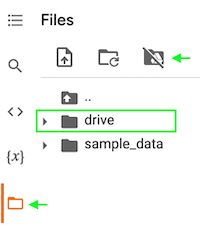

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy your data to your Google Drive
!cp -R /content/nmt/ /content/drive/MyDrive/

In [ ]:
# Install OpenNMT-py 3.x
!pip3 install OpenNMT-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.2/227.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.7/31.7 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━

# Prepare Your Datasets

In [ ]:
# Open the folder where you saved your prepapred datasets from the first exercise
# You might need to mount your Google Drive first
%cd /content/drive/MyDrive/nmt/
!ls

/content/drive/MyDrive/nmt
Anaconda3-5.1.0-Linux-x86_64.sh  UN.en-fr.en-filtered.en
condacolab_install.log		 UN.en-fr.en-filtered.en.subword
config.yaml			 UN.en-fr.en-filtered.en.subword.dev
en-fr.txt.zip			 UN.en-fr.en-filtered.en.subword.test
MT-Preparation			 UN.en-fr.en-filtered.en.subword.train
nmt				 UN.en-fr.fr
README				 UN.en-fr.fr-filtered.fr
run				 UN.en-fr.fr-filtered.fr.subword
source.model			 UN.en-fr.fr-filtered.fr.subword.dev
target.model			 UN.en-fr.fr-filtered.fr.subword.test
UN.en-fr.en			 UN.en-fr.fr-filtered.fr.subword.train


# Create the Training Configuration File

The following config file matches most of the recommended values for the Transformer model [Vaswani et al., 2017](https://arxiv.org/abs/1706.03762). As the current dataset is small, we reduced the following values: 
* `train_steps` - for datasets with a few millions of sentences, consider using a value between 100000 and 200000, or more! Enabling the option `early_stopping` can help stop the training when there is no considerable improvement.
* `valid_steps` - 10000 can be good if the value `train_steps` is big enough. 
* `warmup_steps` - obviously, its value must be less than `train_steps`. Try 4000 and 8000 values.

Refer to [OpenNMT-py training parameters](https://opennmt.net/OpenNMT-py/options/train.html) for more details. If you are interested in further explanation of the Transformer model, you can check this article, [Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/).

In [ ]:
# Create the YAML configuration file
# On a regular machine, you can create it manually or with nano
# Note here we are using some smaller values because the dataset is small
# For larger datasets, consider increasing: train_steps, valid_steps, warmup_steps, save_checkpoint_steps, keep_checkpoint

config = '''# config.yaml


## Where the samples will be written
save_data: run

# Training files
data:
    corpus_1:
        path_src: UN.en-fr.fr-filtered.fr.subword.train
        path_tgt: UN.en-fr.en-filtered.en.subword.train
        transforms: [filtertoolong]
    valid:
        path_src: UN.en-fr.fr-filtered.fr.subword.dev
        path_tgt: UN.en-fr.en-filtered.en.subword.dev
        transforms: [filtertoolong]

# Vocabulary files, generated by onmt_build_vocab
src_vocab: run/source.vocab
tgt_vocab: run/target.vocab

# Vocabulary size - should be the same as in sentence piece
src_vocab_size: 50000
tgt_vocab_size: 50000

# Filter out source/target longer than n if [filtertoolong] enabled
src_seq_length: 150
src_seq_length: 150

# Tokenization options
src_subword_model: source.model
tgt_subword_model: target.model

# Where to save the log file and the output models/checkpoints
log_file: train.log
save_model: models/model.fren

# Stop training if it does not imporve after n validations
early_stopping: 4

# Default: 5000 - Save a model checkpoint for each n
save_checkpoint_steps: 1000

# To save space, limit checkpoints to last n
# keep_checkpoint: 3

seed: 3435

# Default: 100000 - Train the model to max n steps 
# Increase to 200000 or more for large datasets
# For fine-tuning, add up the required steps to the original steps
train_steps: 3000

# Default: 10000 - Run validation after n steps
valid_steps: 1000

# Default: 4000 - for large datasets, try up to 8000
warmup_steps: 1000
report_every: 100

# Number of GPUs, and IDs of GPUs
world_size: 1
gpu_ranks: [0]

# Batching
bucket_size: 262144
num_workers: 0  # Default: 2, set to 0 when RAM out of memory
batch_type: "tokens"
batch_size: 4096   # Tokens per batch, change when CUDA out of memory
valid_batch_size: 2048
max_generator_batches: 2
accum_count: [4]
accum_steps: [0]

# Optimization
model_dtype: "fp16"
optim: "adam"
learning_rate: 2
# warmup_steps: 8000
decay_method: "noam"
adam_beta2: 0.998
max_grad_norm: 0
label_smoothing: 0.1
param_init: 0
param_init_glorot: true
normalization: "tokens"

# Model
encoder_type: transformer
decoder_type: transformer
position_encoding: true
enc_layers: 6
dec_layers: 6
heads: 8
hidden_size: 512
word_vec_size: 512
transformer_ff: 2048
dropout_steps: [0]
dropout: [0.1]
attention_dropout: [0.1]
'''

with open("config.yaml", "w+") as config_yaml:
  config_yaml.write(config)

In [ ]:
# [Optional] Check the content of the configuration file
!cat config.yaml

# config.yaml


## Where the samples will be written
save_data: run

# Training files
data:
    corpus_1:
        path_src: UN.en-fr.fr-filtered.fr.subword.train
        path_tgt: UN.en-fr.en-filtered.en.subword.train
        transforms: [filtertoolong]
    valid:
        path_src: UN.en-fr.fr-filtered.fr.subword.dev
        path_tgt: UN.en-fr.en-filtered.en.subword.dev
        transforms: [filtertoolong]

# Vocabulary files, generated by onmt_build_vocab
src_vocab: run/source.vocab
tgt_vocab: run/target.vocab

# Vocabulary size - should be the same as in sentence piece
src_vocab_size: 50000
tgt_vocab_size: 50000

# Filter out source/target longer than n if [filtertoolong] enabled
src_seq_length: 150
src_seq_length: 150

# Tokenization options
src_subword_model: source.model
tgt_subword_model: target.model

# Where to save the log file and the output models/checkpoints
log_file: train.log
save_model: models/model.fren

# Stop training if it does not imporve after n validations
early_st

# Build Vocabulary, Train Model, and Tune

For large datasets, it is not feasable to use all words/tokens found in the corpus. Instead, build a specific vocabulary set from the training dataset, usually betweeen 32k and 100k words. 

In [ ]:
# Find the number of CPUs/cores on the machine
!nproc --all

2


In [ ]:
# Build Vocabulary

# -config: path to your config.yaml file
# -n_sample: use -1 to build vocabulary on all the segment in the training dataset
# -num_threads: change it to match the number of CPUs to run it faster

!onmt_build_vocab -config config.yaml -n_sample -1 -num_threads 2

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-04-21 20:27:53,964 INFO] Counter vocab from -1 samples.
[2023-04-21 20:27:53,965 INFO] n_sample=-1: Build vocab on full datasets.
[2023-04-21 20:28:01,590 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=2119)

[2023-04-21 20:28:01,688 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=2062)

[2023-04-21 20:28:01,744 INFO] Counters src: 14714
[2023-04-21 20:28:01,744 INFO] Counters tgt: 11888
Traceback (most recent call last):
  File "/usr/local/bin/onmt_build_vocab", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/onmt/bin/build_vocab.py", line 196, in main
    build_vocab_main(opts)
  File "/usr/local/lib/python3.9/dist-packages/onmt/bin/build_vocab.py", line 180, in build_vocab_main
    save_counter(src_counter, opts.src_vocab)
  File "/usr/local/lib/python3.9/dist-packages/onmt/bin/build_vocab.py", li

From the **Runtime menu** > **Change runtime type**, make sure that the "**Hardware accelerator**" is "**GPU**".

In [ ]:
# Check if the GPU is active
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ec5d8400-faca-d8c0-8ca1-2ae5dd96885f)


In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

gpu_memory = torch.cuda.mem_get_info(0)
print("Free GPU memory:", gpu_memory[0]/1024**2, "out of:", gpu_memory[1]/1024**2)

True
Tesla T4
Free GPU memory: 14998.8125 out of: 15101.8125


In [ ]:
!rm -rf drive/MyDrive/nmt/models/

In [ ]:
# Train the NMT model
!onmt_train -config config.yaml

[2023-04-21 20:36:59,621 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-04-21 20:36:59,622 INFO] Parsed 2 corpora from -data.
[2023-04-21 20:36:59,623 INFO] Get special vocabs from Transforms: {'src': [], 'tgt': []}.
[2023-04-21 20:37:00,221 INFO] Building model...
[2023-04-21 20:37:02,826 INFO] NMTModel(
  (encoder): TransformerEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(14720, 512, padding_idx=1)
        )
        (pe): PositionalEncoding()
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linear_keys): Linear(in_features=512, out_features=512, bias=False)
          (linear_values): Linear(in_features=512, out_features=512, bias=False)
          (linear_query): Linear(in_features=512, out_features=512, bias=False)
          (soft

# Final Model and Results

Translation Options:
* `-model` - specify the last model checkpoint name; try testing the quality of multiple checkpoints
* `-src` - the subworded test dataset, source file
* `-output` - give any file name to the new translation output file
* `-gpu` - GPU ID, usually 0 if you have one GPU. Otherwise, it will translate on CPU, which would be slower.
* `-min_length` - [optional] to avoid empty translations
* `-verbose` - [optional] if you want to print translations

Refer to [OpenNMT-py translation options](https://opennmt.net/OpenNMT-py/options/translate.html) for more details.

In [ ]:
# Translate the "subworded" source file of the test dataset
# Change the model name, if needed.
!onmt_translate -model models/model.fren_step_3000.pt -src UN.en-fr.fr-filtered.fr.subword.test -output UN.en.translated -gpu 0 -min_length 1

[2023-04-21 21:22:48,944 INFO] PRED SCORE: -0.1999, PRED PPL: 1.22 NB SENTENCES: 2000


In [ ]:
# Check the first 5 lines of the translation file
!head -n 5 UN.en.translated

▁ • ▁Exchang e ▁of ▁programmes ▁aimed ▁at ▁developing ▁a ▁dialogue ▁and ▁understanding ▁of ▁the ▁scourge s ▁of ▁racism , ▁violence ▁and ▁racism ▁among ▁peoples , ▁in ▁particular ▁among ▁young ▁people ;
▁Guid ed ▁by ▁international ▁legal ▁instruments , ▁documents ▁and ▁recommendations ▁against ▁corruption
▁ 2 7 . ▁Calls ▁upon ▁States ▁and ▁private ▁entities ▁concerned ▁to ▁cooperate ▁fully ▁with ▁the ▁International ▁ Maritime ▁Organization , ▁including ▁by ▁submitt ing ▁reports ▁on ▁incidents ▁to ▁the ▁organization ▁and ▁by ▁implementing ▁its ▁guidelines ▁on ▁preventing ▁attacks ▁of ▁piracy ▁and ▁ armed ▁robbery ;
▁Recalling ▁the ▁Unit ed ▁Nations ▁Millennium ▁Declaration See ▁resolution ▁ 5 5 / 2 . ▁and ▁the ▁outcome ▁documents ▁of ▁the ▁twenty - third Resolution ▁S - 2 3 / 2 , ▁annex , ▁and ▁S - 2 3 / 3 , ▁annex . ▁and ▁twenty - fourth Resolution ▁S - 2 4 / 2 , ▁annex . ▁special ▁sessions ▁of ▁the ▁General ▁Assembly , ▁held , ▁respectively , ▁in ▁New ▁York ▁from ▁ 5 ▁to ▁ 1 0 ▁June ▁ 

In [ ]:
# If needed install/update sentencepiece
!pip3 install --upgrade -q sentencepiece

# Desubword the translation file
!python3 MT-Preparation/subwording/3-desubword.py target.model UN.en.translated

Done desubwording! Output: UN.en.translated.desubword


In [ ]:
# Check the first 5 lines of the desubworded translation file
!head -n 5 UN.en.translated.desubword

• Exchange of programmes aimed at developing a dialogue and understanding of the scourges of racism, violence and racism among peoples, in particular among young people;
Guided by international legal instruments, documents and recommendations against corruption
27. Calls upon States and private entities concerned to cooperate fully with the International Maritime Organization, including by submitting reports on incidents to the organization and by implementing its guidelines on preventing attacks of piracy and armed robbery;
Recalling the United Nations Millennium DeclarationSee resolution 55/2. and the outcome documents of the twenty-thirdResolution S-23/2, annex, and S-23/3, annex. and twenty-fourthResolution S-24/2, annex. special sessions of the General Assembly, held, respectively, in New York from 5 to 10 June 2000 and in Geneva from 26 June to 1 July 2000,
13. Requests the Secretary-General to continue to monitor the implementation of resolution 41/11 and subsequent resolutions 

In [ ]:
# Desubword the target file (reference) of the test dataset
# Note: You might as well have split files *before* subwording during dataset preperation, 
# but sometimes datasets have tokeniztion issues, so this way you are sure the file is really untokenized.
!python3 MT-Preparation/subwording/3-desubword.py target.model UN.en-fr.en-filtered.en.subword.test

Done desubwording! Output: UN.en-fr.en-filtered.en.subword.test.desubword


In [ ]:
# Check the first 5 lines of the desubworded reference
!head -n 5 UN.en-fr.en-filtered.en.subword.test.desubword

• Implementation of programmes to enhance the spirit of dialogue, understanding and rejection of intolerance, violence and racism among people, particularly the youth;
Indicative list of international legal instruments, documents and recommendations against corruption
27. Calls upon States and private entities concerned to cooperate fully with the International Maritime Organization, including by submitting reports on incidents to the organization and by implementing its guidelines on preventing attacks of piracy and armed robbery;
Recalling the United Nations Millennium DeclarationSee resolution 55/2. and the outcome documents of the twenty-thirdResolutions S-23/2, annex, and S-23/3, annex. and twenty-fourthResolution S-24/2, annex. special sessions of the General Assembly, held, respectively, in New York from 5 to 10 June 2000 and Geneva from 26 June to 1 July 2000,
13. Requests the Secretary-General to keep the implementation of resolution 41/11 and subsequent resolutions on the mat

# Evaluation

We are using BLEU for evaluation. Files must be detokenized/desubworded beforehand.

In [ ]:
# Download the BLEU script
!wget https://raw.githubusercontent.com/ymoslem/MT-Evaluation/main/BLEU/compute-bleu.py

--2023-04-21 21:24:16--  https://raw.githubusercontent.com/ymoslem/MT-Evaluation/main/BLEU/compute-bleu.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 957 [text/plain]
Saving to: ‘compute-bleu.py’

compute-bleu.py     100%[===================>]     957  --.-KB/s    in 0s      

2023-04-21 21:24:16 (33.5 MB/s) - ‘compute-bleu.py’ saved [957/957]



In [ ]:
# Install sacrebleu
!pip3 install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Evaluate the translation (without subwording)
!python3 compute-bleu.py UN.en-fr.en-filtered.en.subword.test.desubword UN.en.translated.desubword

Reference 1st sentence: • Implementation of programmes to enhance the spirit of dialogue, understanding and rejection of intolerance, violence and racism among people, particularly the youth;
MTed 1st sentence: • Exchange of programmes aimed at developing a dialogue and understanding of the scourges of racism, violence and racism among peoples, in particular among young people;
BLEU:  68.40297343405935
